# **1. Perkenalan Dataset**


Dataset ini bersumber dari platform Kaggle dan dapat diakses melalui tautan berikut:
https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction

Dataset ini berisi data pengajuan pinjaman yang digunakan untuk
memprediksi kelayakan pemohon dalam menerima pinjaman (Loan_Status).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [29]:
df = pd.read_csv("Loan_Eligibility.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [30]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [32]:
df.isnull().sum()

,0
Customer_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0


In [33]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
df.duplicated().sum()

np.int64(0)

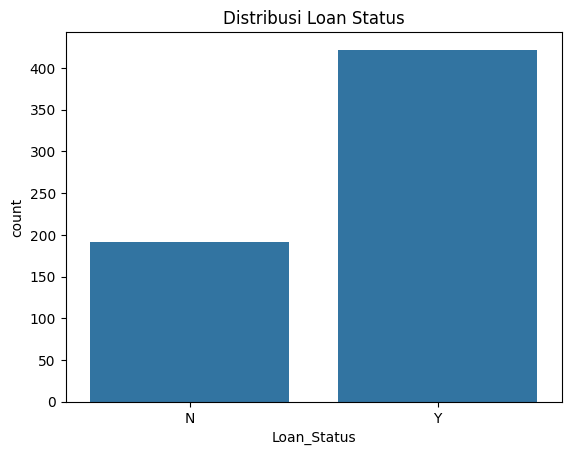

In [35]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Distribusi Loan Status")
plt.show()

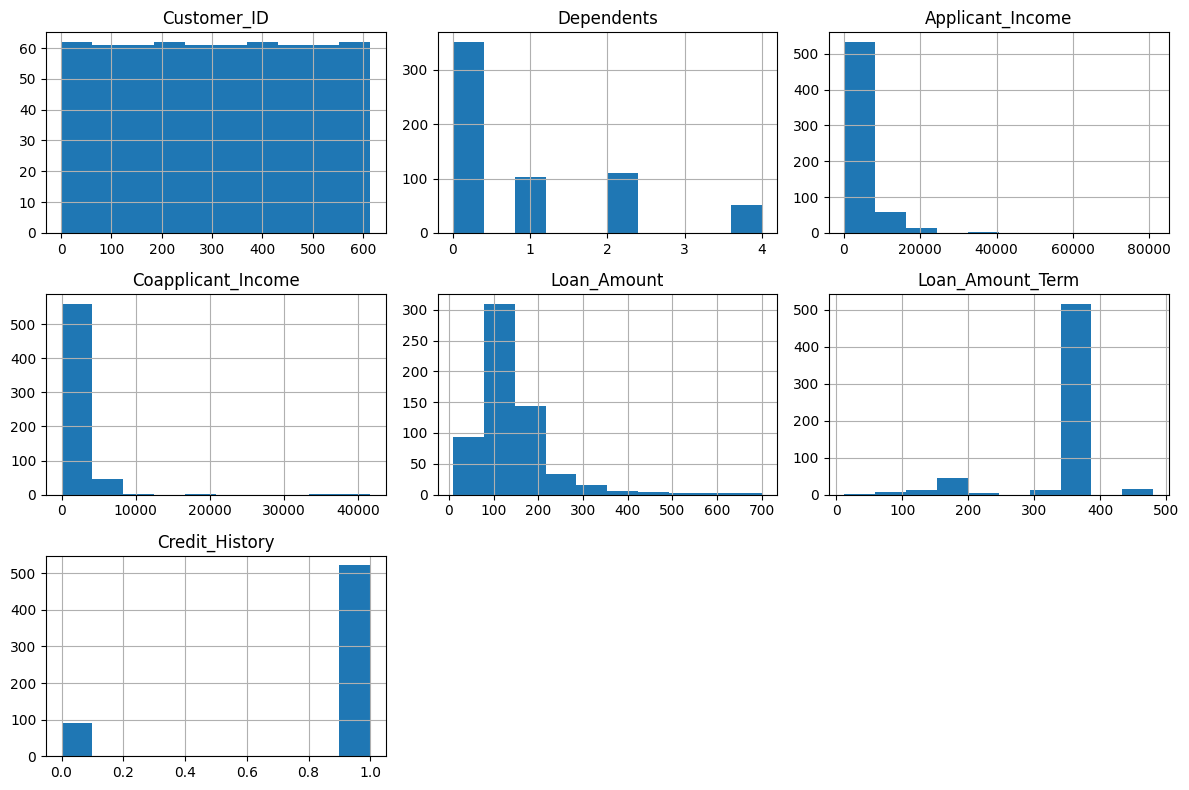

In [36]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

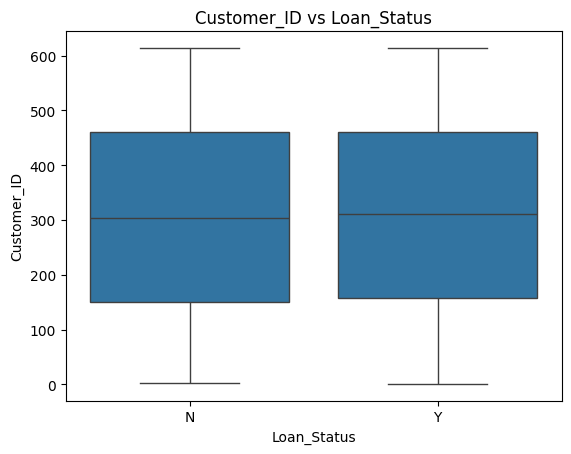

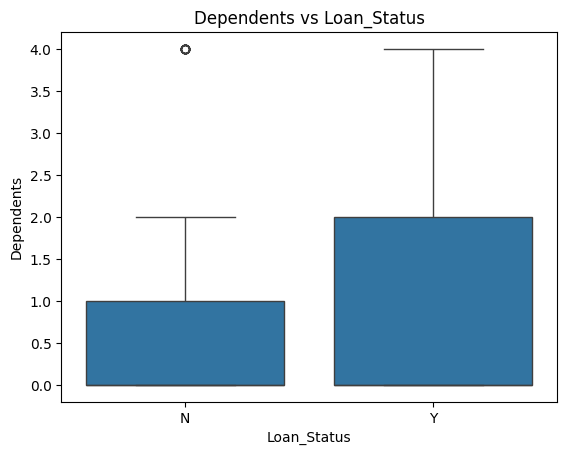

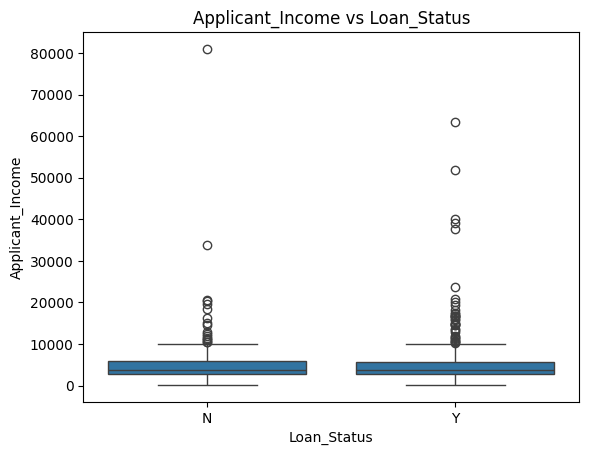

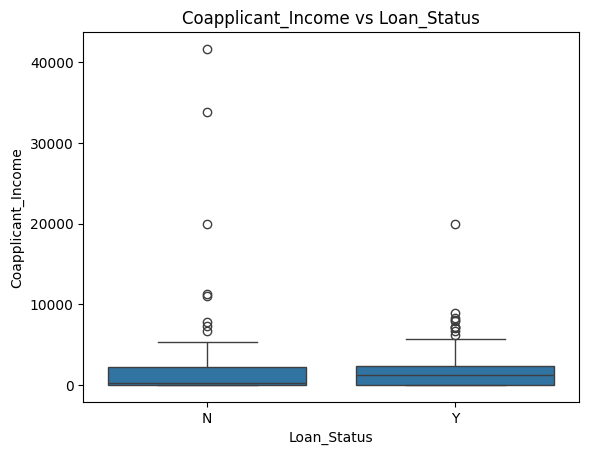

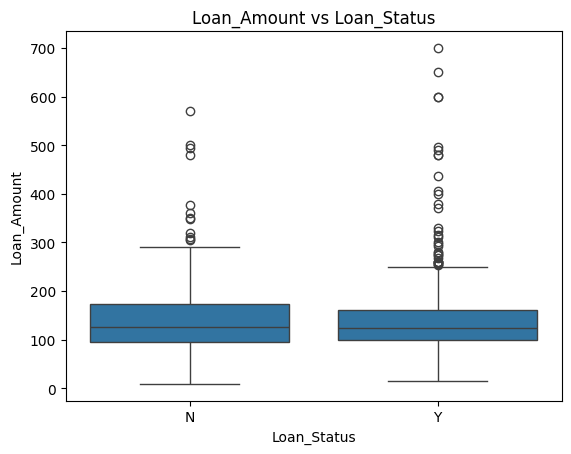

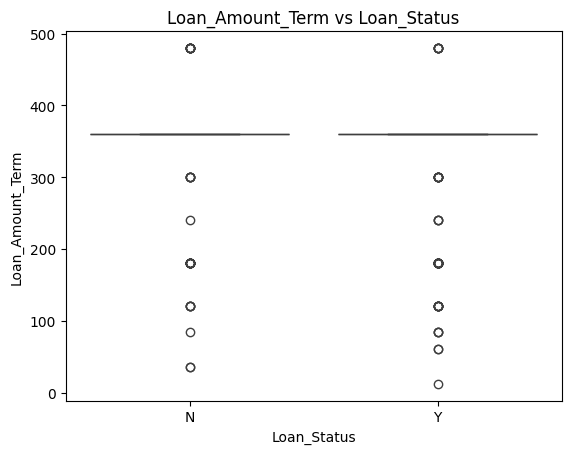

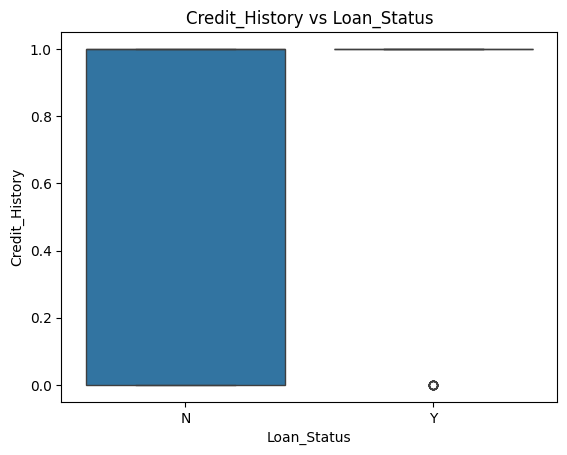

In [37]:
for col in numeric_cols:
    sns.boxplot(x="Loan_Status", y=col, data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()

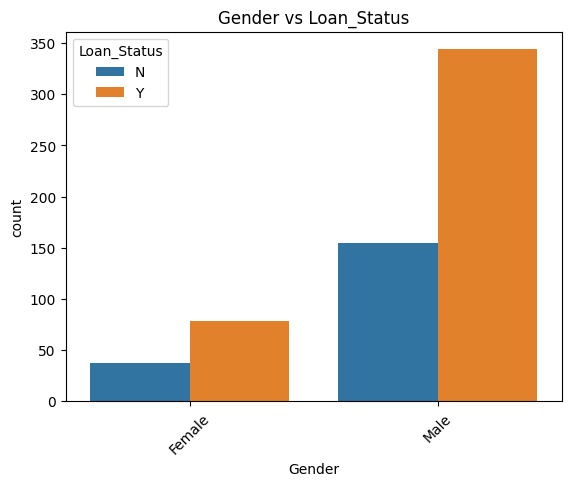

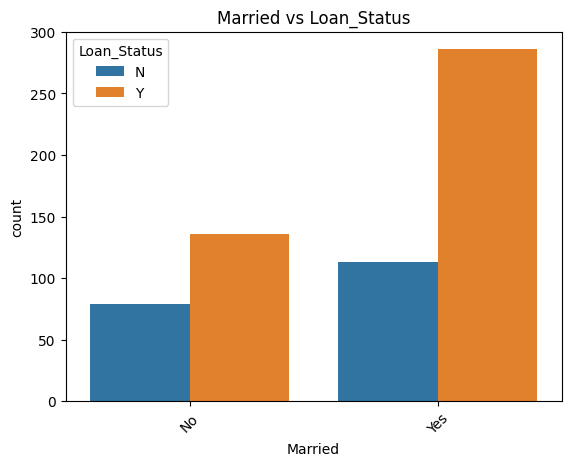

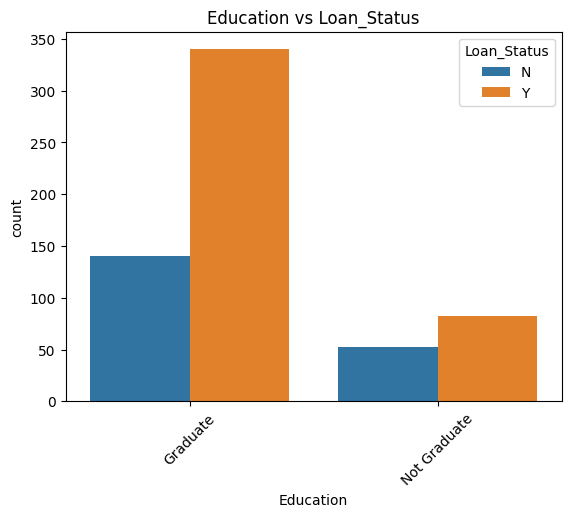

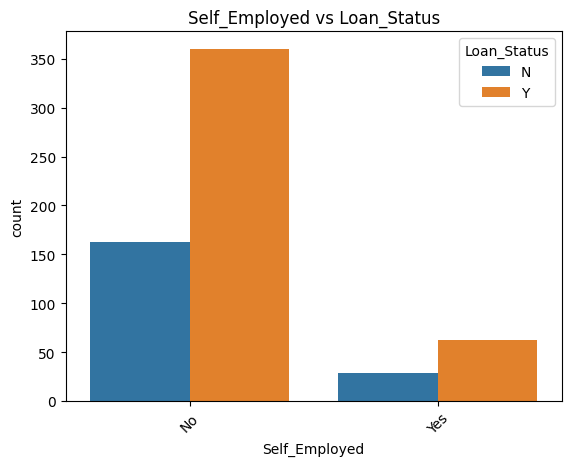

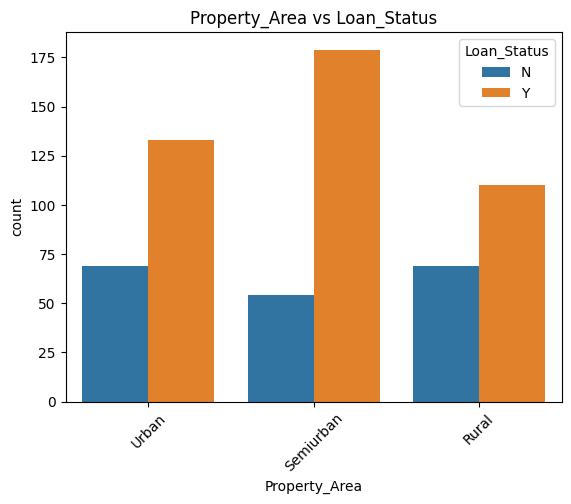

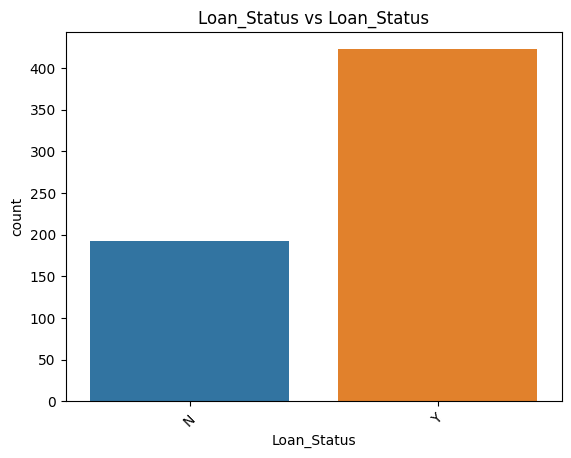

In [38]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    sns.countplot(x=col, hue="Loan_Status", data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.show()

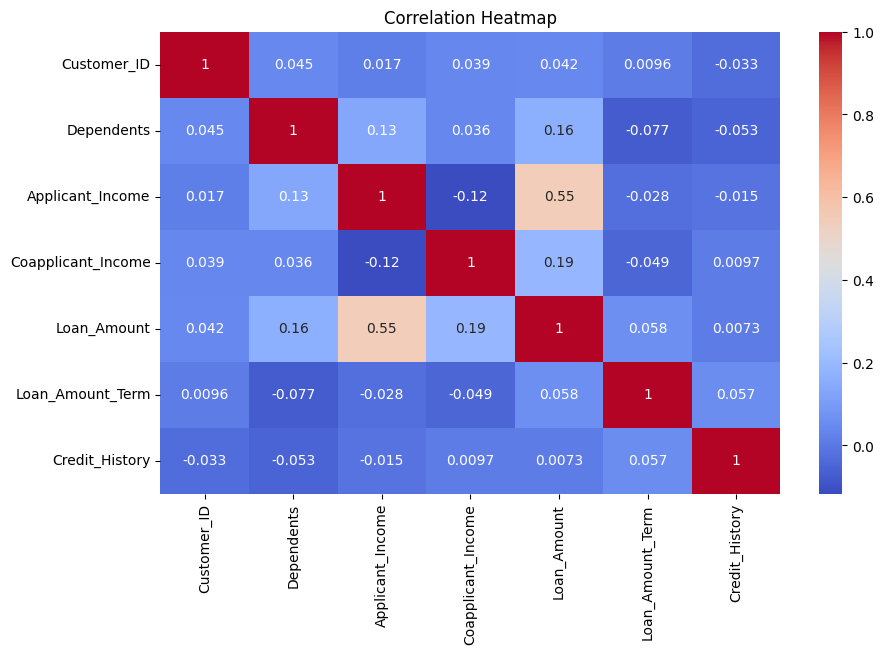

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [40]:
df.drop(columns=['Customer_ID'], inplace=True)

In [41]:
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [42]:
numeric_features = [
    'Applicant_Income',
    'Coapplicant_Income',
    'Loan_Amount',
    'Loan_Amount_Term'
]

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [43]:
df.to_csv("Loan_Eligibility_preprocessing.csv", index=False)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,-0.495647,-0.554487,-1.528784,0.303009,1,2,0
1,1,1,2,0,0,-0.672414,-0.183061,-1.436843,-3.142318,1,2,1
2,1,0,0,1,0,-0.292176,-0.554487,-1.344902,-3.142318,1,1,1
3,1,1,0,0,1,-0.318552,-0.554487,-1.344902,-3.142318,1,1,1
4,1,1,1,0,0,0.010573,-0.201530,-1.333409,0.303009,1,1,1
